# Modelproject: The Solow Model with techonlogical growth extented with human capital

This project presents the solow model with technological growth and then extends it with human captial.

In [1]:
import numpy as np
from scipy import optimize
import ipywidgets as widgets
import matplotlib.pyplot as plt
import sympy as sm
from sympy import *

import ny_modelproject_wilhelm as ny

plt.style.use('seaborn-whitegrid')


%load_ext autoreload
%autoreload 2

# The Solow Model with technological growth

## Setup 

The Solow Model consists of the following four equations.

**Time:** Discrete and indexed by $t\in\{0,1,\dots\}$.

**Demographics:** Population of size $L_t$ that grow with the rate $n$ in each period:

$$L_{t+1} = (1+n)L_{t}$$

Households supply labur $L_t$ exogenously and independant of wages.

**Households**: Households decide how much to save in order to buy both capital:
$$S_t = s Y_t$$
Consumption is income, $Y_t$ minus savings, $S_t$:
$$C_t = Y_t - S_t = (1 - s)Y_t$$


**Production:** Firms produce with a cobb douglas function. They use capital, $K_t$; labour, $L_t$ and technology, $A_t$

$$Y_{t} = K_{t}^\alpha(A_{t}L_{t})^{1-\alpha}$$

Capital accumulates at the saving rate and depreciates at the depreciation rate, $\delta$, which is exogenously given:
$$K_{t+1} = sY_{t}+(1-\delta)K_{t}$$

**Technology:** Technology accumulates at the rate, $g$.
$$A_{t+1} = (1+g)A_t$$

## Analytical solution 

I cannot write $\tilde{k}_{t+1}$ in sympy, so I have to solve the model without.

**The transistion equation**

I find the transistion equation for kapital:

$$ \tilde{k}_{t+1} = \frac{1}{(1+n)(1+g)}(s \tilde{k}_t^\alpha+ (1-\delta)\tilde{k}_t)$$

**The Solow equation**

By substracting capital and human capital in period t, we get the solow equations:
$$ \tilde{k}_{t+1} - \tilde{k}_{t} = \frac{1}{(1+n)(1+g)}(s\tilde{k}_t^\alpha - (n + g + \delta + ng)\tilde{k}_t)$$

**Steady state**

In steady state, the change in capital and human capital is zero: 

$$ 0 = \frac{1}{(1+n)(1+g)}(s\tilde{k}_t^\alpha - (n + g + \delta + ng)\tilde{k}_t)$$

Here we have two equations with two unknowns. This is easy to solve with math and yieds: 

$$ \tilde{k}^* = \frac{s}{n+g+\delta+ng}^\frac{1}{1-\alpha}$$

Income is then: 

$$\tilde{y}^* = (\tilde{k}^*)^\alpha = \frac{s}{n+g+\delta+ng}^\frac{\alpha}{1-\alpha}$$

## Numerical solution and analysis 

### Numerical solution

In [2]:
#Plausible values for the parameters
alpha = 1/3
n = 0.02
g = 0.02
s = 0.4
delta = 0.02

In [3]:
# define a function of k
object = lambda k: ny.k_solow_equation(k, alpha, n, g, s, delta)

In [4]:
# solve for k
sol = optimize.bisect(object, 1, 100, full_output=False)

In [5]:
sol

17.042550087913966

### Phase diagram

In [6]:
def transistion_diagram(k, alpha, n, g, s, delta, t):
    ''' the transistion diagram
    
    Args: 
        k (float): capital
        alpha (float): capital share
        n (float): population growth rate
        g (float): rate of technological development
        s (float): savings rate
        delta (float): depreciation rate
        t (int): periods
    
    Returns: 
    
        diagram whith growth in captial that illustrates the growthpath towards steady state
        
    '''
    # lists for the two lines that make up the diagram
    fortyfive = [0]
    k_values = [k]

    # the 45 line values
    for a in range(1, t):
        x = (n+g+n*g+delta)*a
        fortyfive.append(x)
        
    # capital growth
    for a in range(1, t):
        k_t = s*a**alpha
        k_values.append(k_t)
        
    # make the plot
    plt.figure()
    plt.plot(fortyfive[:t], label=r'$(n+g+ng+\delta)k_t$')
    plt.plot(k_values[:t], label=r'$s\tilde{k}_t^{\alpha}$')
    plt.xlim(0, t)
    plt.ylim(0, fortyfive[-1])
    plt.xlabel('$k_t$')
    plt.ylabel('$k_{t+1}$')
    plt.legend()
    plt.title('Transition diagram')

In [7]:
# interactive plot
widgets.interact(transistion_diagram, 
                k = widgets.fixed(0), 
                alpha = widgets.FloatSlider(description = r'$\alpha$', min=0, max=0.99, step=0.05, value=0.33),
                n = widgets.FloatSlider(description ='$n$', min=0.01, max=0.2, step=0.005, value=0.02),
                g = widgets.FloatSlider(description = '$g$', min=0.01, max=0.1, step=0.005, value= 0.02),
                s = widgets.FloatSlider(description = '$s$', min=0.01, max=0.99, step=0.01, value=0.4),
                delta = widgets.FloatSlider(description = r'$\delta$', min=0, max=0.2, step=0.005, value=0.02),
                t = widgets.IntSlider(description='t', min = 1, max = 1000, step = 10, value = 100))
plt.show()

interactive(children=(FloatSlider(value=0.33, description='$\\alpha$', max=0.99, step=0.05), FloatSlider(value…

# Extension with human capital 

## Setup

The Solow Model with human capital makes the following changes:

**Households**: Households decide how much to save in order to buy both capital and human capital:
$$S_t = (s_K + s_H)Y_t$$
Consumption is income, $Y_t$ minus savings, $S_t$:
$$C_t = Y_t - S_t = (1 - s_K - s_H)Y_t$$

**Production:** Firms produce with a cobb douglas function. They use capital, $K_t$; labour, $L_t$; technology, $A_t$ and human capital, $H_t$.

$$Y_{t} = K_{t}^\alpha H_{t}^\phi (A_{t}L_{t})^{1-\alpha-\phi}$$

Capital and human capital accumulates at the saving rats and depreciates at the depreciation rate, $\delta$, which is exogenously given:
$$K_{t+1} = s_{K}Y_{t}+(1-\delta)K_{t}$$
$$H_{t+1} = s_{H}Y_{t}+(1-\delta)H_{t}$$

## Analytical solution

**The transistion equation**

I can find the transistion equation for kapital and human capital:

$$ \tilde{k}_{t+1} = \frac{1}{(1+n)(1+g)}(s_K \tilde{k}_t^\alpha \tilde{h}_t^\phi + (1-\delta)\tilde{k}_t$$
$$ \tilde{h}_{t+1} = \frac{1}{(1+n)(1+g)}(s_H \tilde{k}_t^\alpha \tilde{h}_t^\phi + (1-\delta)\tilde{h}_t$$

**The Solow equation**

By substracting capital and human capital in period t, I get the solow equations:
$$ \tilde{k}_{t+1} - \tilde{k}_{t} = \frac{1}{(1+n)(1+g)}(s_K \tilde{k}_t^\alpha \tilde{h}_t^\phi - (n + g + \delta + ng)\tilde{k}_t$$
$$ \tilde{h}_{t+1} - \tilde{h}_{t} = \frac{1}{(1+n)(1+g)}(s_H \tilde{k}_t^\alpha \tilde{h}_t^\phi - (n + g + \delta + ng)\tilde{h}_t$$

**Steady state**

In steady state, the change in capital and human capital is zero: 

$$ 0 = \frac{1}{(1+n)(1+g)}(s_K \tilde{k}_t^\alpha \tilde{h}_t^\phi - (n + g + \delta + ng)\tilde{k}_t$$
$$ 0 = \frac{1}{(1+n)(1+g)}(s_H \tilde{k}_t^\alpha \tilde{h}_t^\phi - (n + g + \delta + ng)\tilde{h}_t$$

Here I have two equations with two unknowns. This is easy to solve with math and yieds: 

$$ \tilde{k}^* = \frac{s_K^{1-\phi}s_H^\phi}{n+g+\delta+ng}^\frac{1}{1-\alpha-\phi}$$
$$ \tilde{h}^* = \frac{s_K^{\alpha}s_H^{1-\alpha}}{n+g+\delta+ng}^\frac{1}{1-\alpha-\phi}$$

Income is then: 

$$\tilde{y}^* = (\tilde{k}^*)^\alpha (\tilde{h}^*)^\phi$$
$$= \frac{s_K}{n+g+\delta+ng}^\frac{\alpha}{1-\alpha-\phi} \frac{s_H}{n+g+\delta+ng}^\frac{\phi}{1-\alpha-\phi}$$

## Nummerical solution and analysis

### Solution 

In [8]:
# parameters for human capital and specifying savings rate for capital
phi = 1/3
s_k = 0.2
s_h = 0.2

In [9]:
# define a function containing our h- and k-functions as well as vectors in place of the endogenous variables
object = lambda x: [ny.k_solow_equation_human(x[1], x[0], alpha, phi, n, g, s_k, s_h, delta),
                    ny.h_solow_equation_human(x[1], x[0], alpha, phi, n, g, s_k, s_h, delta)]

In [10]:
#We solve the vector functions
sol = optimize.root(object, [100, 100], method='broyden1')

In [11]:
# the steady state values for technology adjusted capital and human capital per capita
sol.x

array([36.3060819, 36.3060819])

### Phase diagram 

In [12]:
k_vec, h_vec_k, h_vec_h=ny.solve_human(alpha, phi, n, g, s_k, s_h, delta)

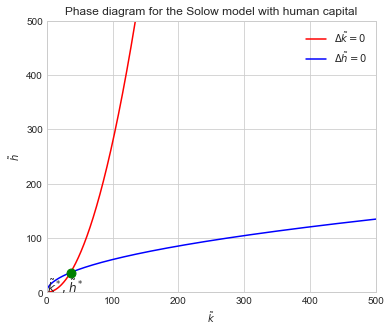

In [13]:
fig = plt.figure(figsize=(13, 5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(h_vec_k, k_vec, label=r'$\Delta \tilde{k}=0$', color='red')
ax.plot(k_vec, h_vec_k, label=r'$\Delta \tilde{h}=0$', color='blue')
ax.set_ylabel(r'$\tilde{h}$')
ax.set_xlabel(r'$\tilde{k}$')
ax.legend()  

# mark steady state
plt.scatter(sol.x[1],sol.x[0], color='green', s=80,zorder=2.5)

# axes setup
ax.text(0.07, 0.07, r'$\tilde{k}^*, \tilde{h}^*$', fontsize=12)
ax.set(xlim=(0, 500), ylim=(0, 500))
ax.set_title('Phase diagram for the Solow model with human capital');

# Conclusion

I have modelled the solow model with and without human capital. Both models finds a staeady state, which is visualized through the transistion diagrammes. The steady state values are quite a bit higher for the model with human capital than the one without.